# An Exploratory Data Analysis of the Iris Dataset

### Goal:
Given the four features (petal width, petal length, sepal width, and sepal length), classify an Iris flower into one of the three species (Setosa, Virginica, and Versicolor).
### Download the Iris Data Set
https://gist.github.com/netj/8836201

In [21]:
# Import the dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Mount GDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
from sklearn.datasets import load_breast_cancer
# Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Convert to DataFrame
df = pd.DataFrame(X, columns=data.feature_names)
df1 = df[['mean radius', 'mean texture', 'mean perimeter', 'mean area']]
df['target'] = y

# Display the first few rows of the DataFrame
df1.head()

,mean radius,mean texture,mean perimeter,mean area
0,17.99,10.38,122.80,1001.0
1,20.57,17.77,132.90,1326.0
2,19.69,21.25,130.00,1203.0
3,11.42,20.38,77.58,386.1
4,20.29,14.34,135.10,1297.0


In [35]:
df1.shape

(569, 4)

In [33]:
df1 = df[['mean radius', 'mean texture', 'mean perimeter', 'mean area']]

In [30]:
from sklearn.datasets import make_blobs

# Generate synthetic data using make_blobs
X, y = make_blobs(n_samples=350, centers=2, cluster_std=2.0, random_state=42)

# Convert to DataFrame for visualization
df_blobs = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df_blobs['Target'] = y

# Display the first few rows of the DataFrame
df_blobs.head()

,Feature 1,Feature 2,Target
0,6.061799,2.861696,1
1,-0.662061,4.156183,1
2,-2.081010,6.522809,0
3,-4.276912,9.321736,0
4,-0.343095,11.121890,0


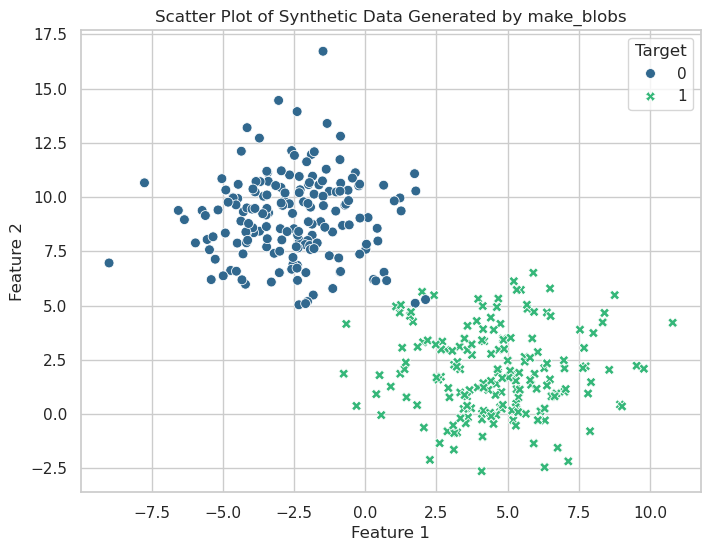

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Feature 1', 
    y='Feature 2', 
    hue='Target', 
    data=df_blobs, 
    palette='viridis', 
    style='Target', 
    s=50
)
plt.title('Scatter Plot of Synthetic Data Generated by make_blobs')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Target')
plt.show()

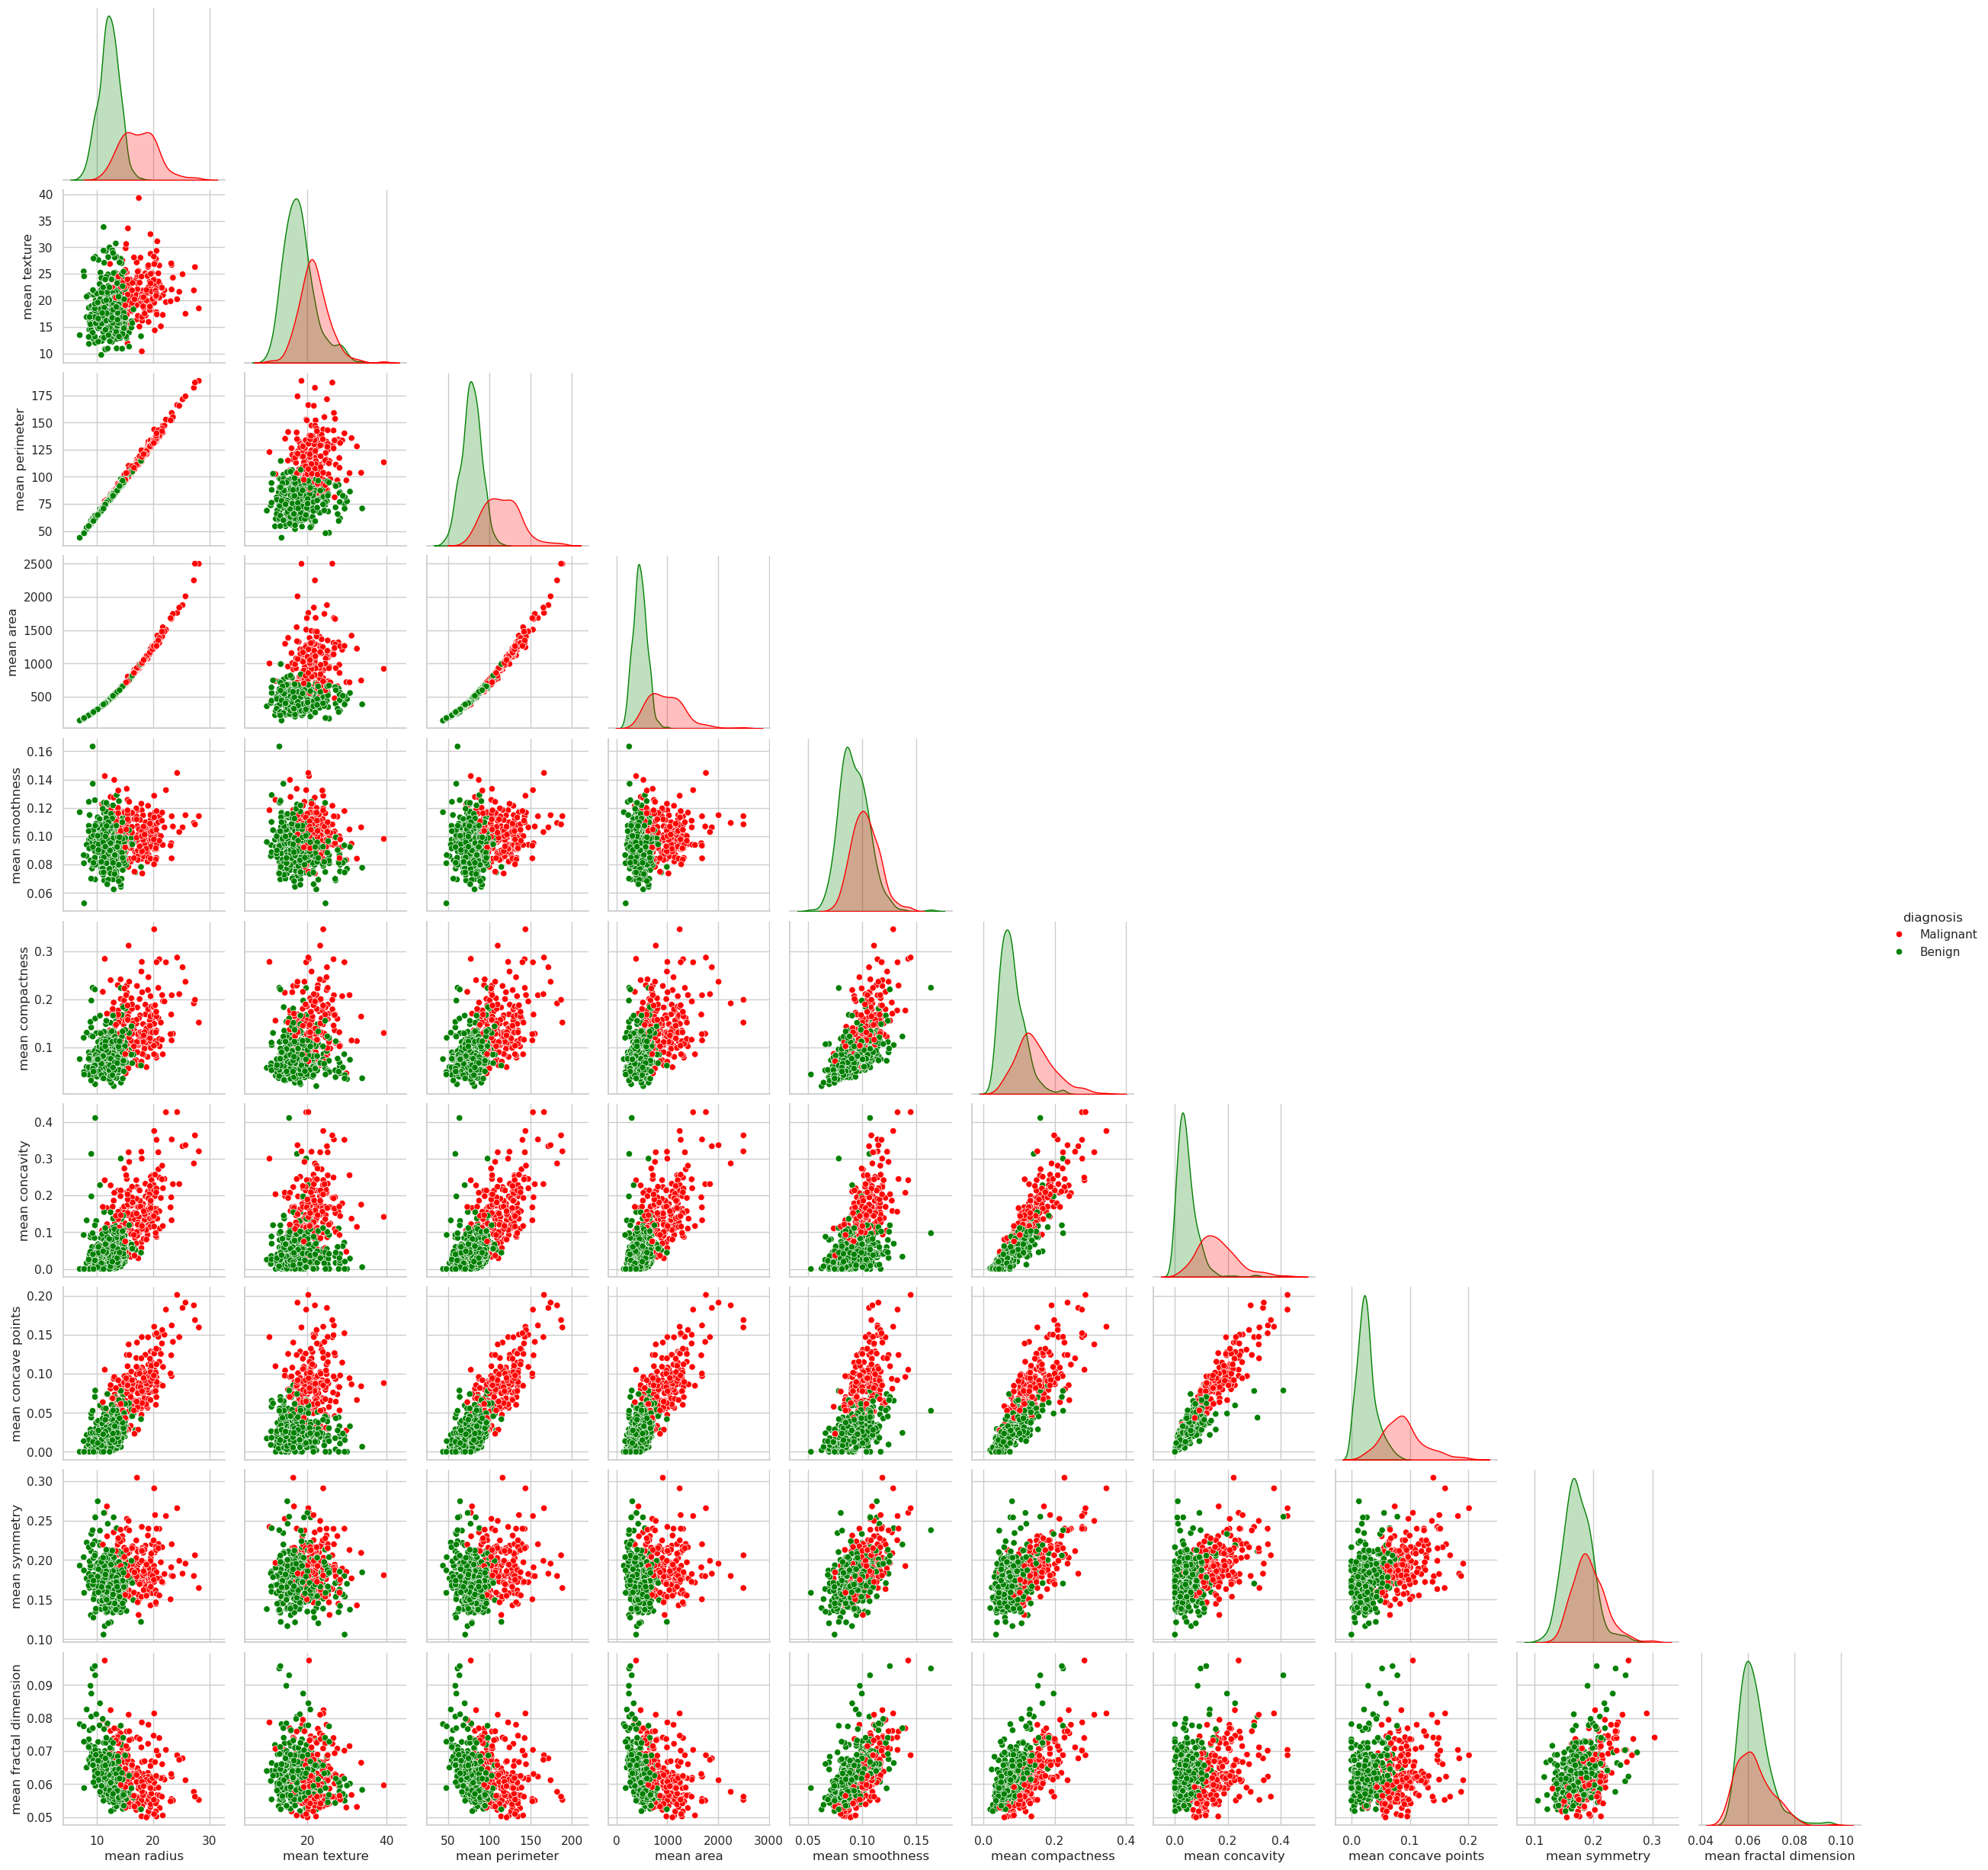

In [20]:
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load the dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Map target to labels (0 = malignant, 1 = benign)
df['diagnosis'] = df['target'].map({0: 'Malignant', 1: 'Benign'})

# Select only 'mean' columns + diagnosis for pairplot
mean_columns = [col for col in df.columns if 'mean' in col]
mean_columns.append('diagnosis')  # Add the target label column

# Create pairplot
sns.pairplot(df[mean_columns], hue='diagnosis', palette={'Malignant': 'red', 'Benign': 'green'}, corner=True)
sns.set_style("whitegrid")

In [3]:
# Load the data set
iris = pd.read_csv('iris.csv')

In [4]:
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [6]:
iris.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [7]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris.groupby('variety').agg(['mean', 'median'])

sepal.length        sepal.width        petal.length         \
                   mean median        mean median         mean median   
variety                                                                 
Setosa            5.006    5.0       3.428    3.4        1.462   1.50   
Versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
Virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal.width         
                  mean median  
variety                        
Setosa           0.246    0.2  
Versicolor       1.326    1.3  
Virginica        2.026    2.0

In [9]:
iris.groupby('variety').std()

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Setosa,0.352490,0.379064,0.173664,0.105386
Versicolor,0.516171,0.313798,0.469911,0.197753
Virginica,0.635880,0.322497,0.551895,0.274650


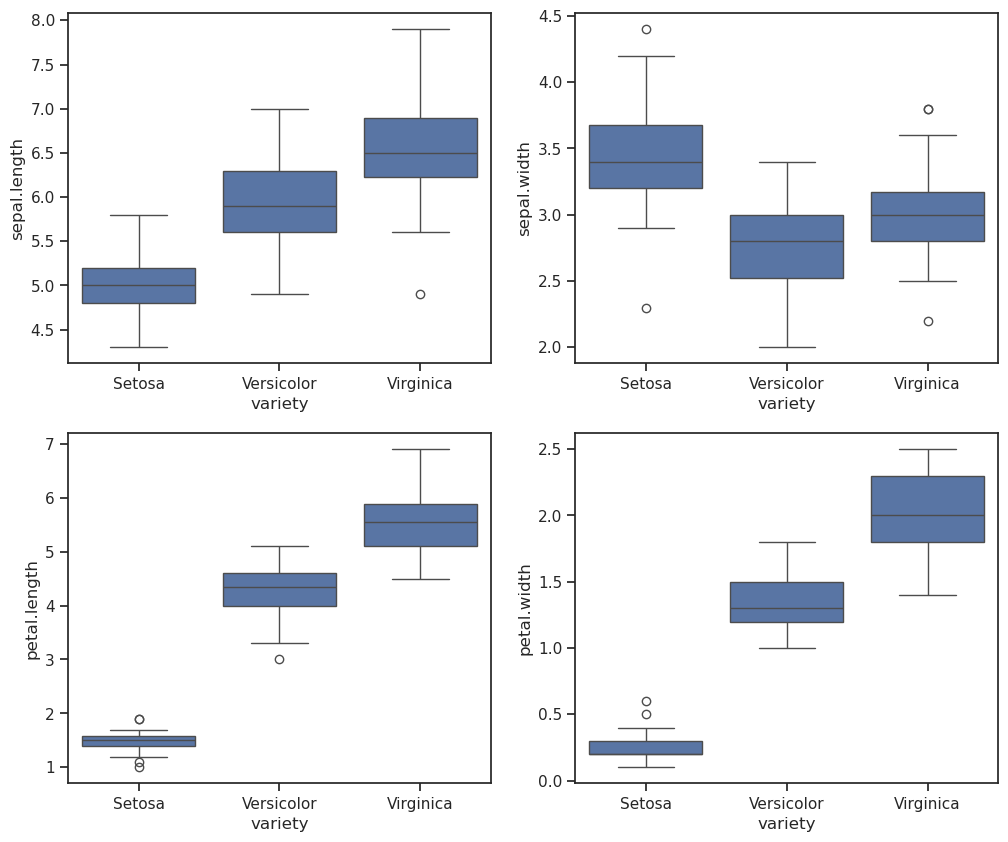

In [10]:
# box plot
sns.set(style="ticks")
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='variety',y='sepal.length',data=iris)
plt.subplot(2,2,2)
sns.boxplot(x='variety',y='sepal.width',data=iris)
plt.subplot(2,2,3)
sns.boxplot(x='variety',y='petal.length',data=iris)
plt.subplot(2,2,4)
sns.boxplot(x='variety',y='petal.width',data=iris)
plt.show()

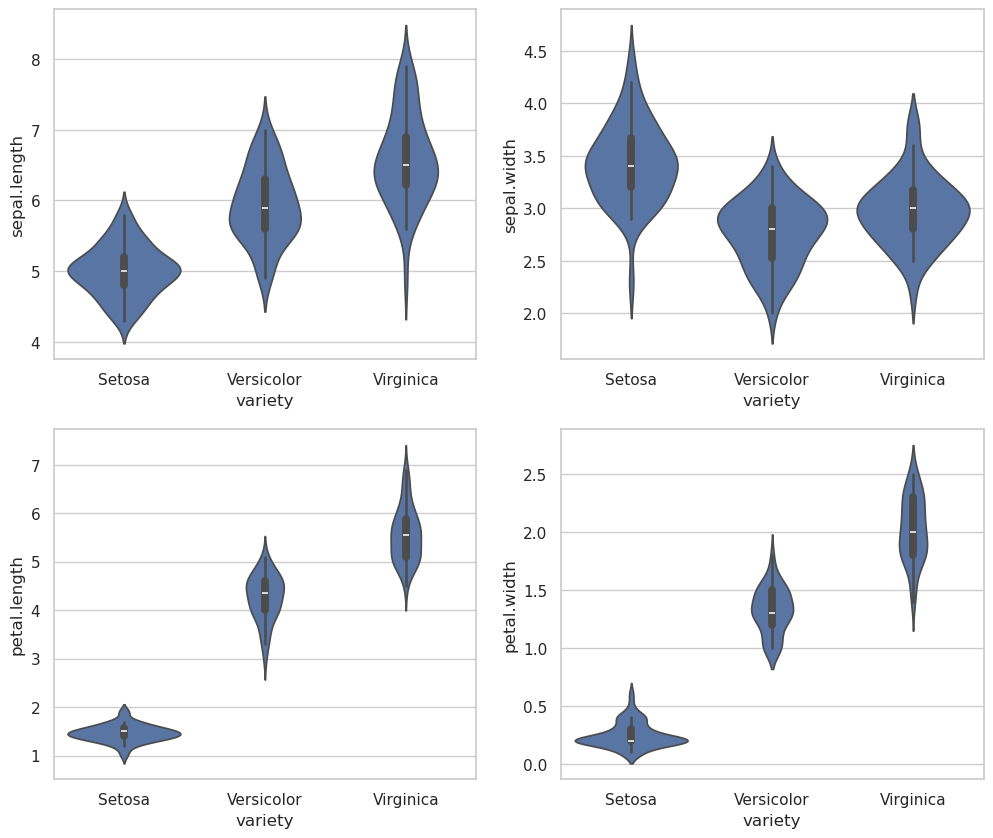

In [11]:
# violin plot
sns.set(style='whitegrid')
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.violinplot(x='variety',y='sepal.length',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='variety',y='sepal.width',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='variety',y='petal.length',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='variety',y='petal.width',data=iris)
plt.show()

### Probability Density Function: Determining the most important feature

In [12]:
# Splitting the Data Frame according to the class labels
iris_versicolor = iris[iris['variety'] == 'versicolor']
iris_virginica = iris[iris['variety'] == 'virginica']

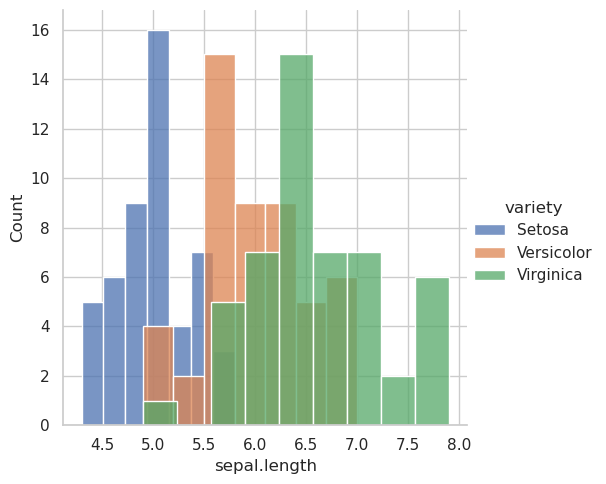

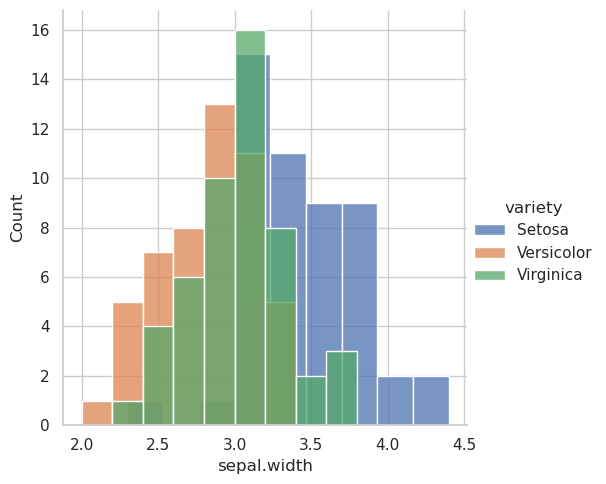

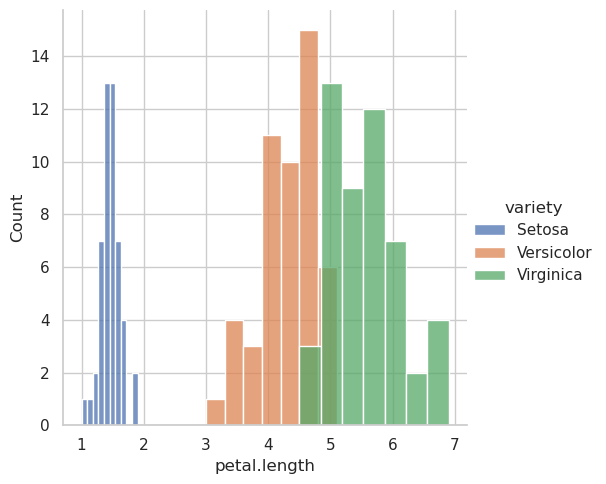

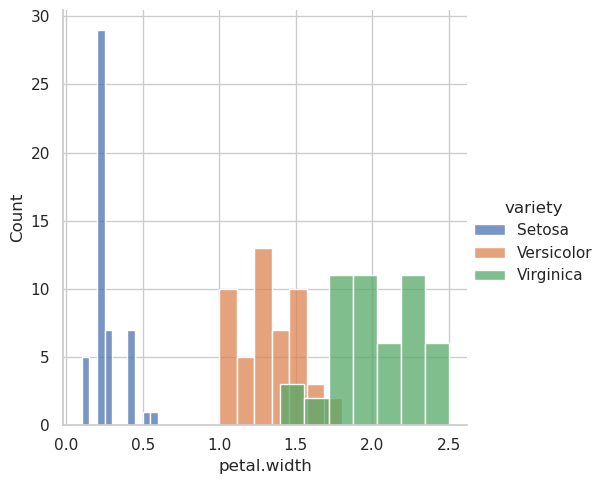

In [13]:
sns.FacetGrid(iris, hue='variety', height=5) \
   .map(sns.histplot, 'sepal.length') \
   .add_legend();
sns.FacetGrid(iris, hue='variety', height=5) \
   .map(sns.histplot, 'sepal.width') \
   .add_legend();
sns.FacetGrid(iris, hue='variety', height=5) \
   .map(sns.histplot, 'petal.length') \
   .add_legend();
sns.FacetGrid(iris, hue='variety', height=5) \
   .map(sns.histplot, 'petal.width') \
   .add_legend();
plt.show()

Source: https://medium.com/analytics-vidhya/exploratory-data-analysis-uni-variate-analysis-of-iris-data-set-690c87a5cd40